# Data Science Study Analysis

This notebook analyzes the data collected in the study regarding the state of the Data Science field, saved in the file `data/surveyDataScience.csv`.

Descriptive information will be calculated (number of respondents, attributes, completeness), the duration of higher education will be estimated (using assumptions: bachelor's = 3 years, master's = 2 years, doctorate = 3 years), subgroups will be filtered and compared (e.g., respondents from Romania, women from Romania who program in Python or C++), the range of values for each attribute will be summarized, and information on programming experience will be transformed to calculate statistical moments (min, max, mean, standard deviation, median).

Additionally, visualizations will be created to highlight distributions by age categories and identify outliers in programming experience.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Ensure graphs are displayed in the notebook
%matplotlib inline

# Load the CSV file
file_path = 'data/surveyDataScience.csv'
df = pd.read_csv(file_path)

print('First 5 records:')
display(df.head())

First 5 records:


/var/folders/kh/6c9k1mvs3x14g59m82lmkd8m0000gn/T/ipykernel_48667/2566032646.py:11: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.a. Descriptive Analyses

In [2]:
# 1. Total number of respondents
num_respondents = df.shape[0]
print('Total number of respondents:', num_respondents)

# 2. Number and type of attributes (properties) for a respondent
num_attributes = df.shape[1]
print('Number of attributes:', num_attributes)

print('\nType of each attribute:')
print(df.dtypes)

Total number of respondents: 25974
Number of attributes: 369

Type of each attribute:
Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object


In [3]:
# 3. Number of respondents with complete data
df_copy = df.dropna()
num_complete = df_copy.shape[0]
print('Number of respondents with complete data:', num_complete)

Number of respondents with complete data: 1


### Calculating the Average Duration of Higher Education

Assumptions:
- Bachelor's studies last **3 years**
- Master's studies last **2 years**
- Doctoral studies last **3 years**

The average duration is calculated for:
- Respondents with complete data
- Respondents from Romania
- Respondents from Romania who are women

In [4]:
# Column name for education (according to CSV header)
edu_col = "Q4"

# Inspect unique values in the education column
print("Unique values in the education column:", df[edu_col].unique())

# Update the mapping for study durations according to dataset values
edu_mapping = {
    "Bachelor’s degree": 3,  # Bachelor's degree - 3 years
    "Master’s degree": 2,  # Master's degree - 2 years
    "Doctoral degree": 3,  # Doctoral degree - 3 years
    "Professional doctorate": 3,  # Alternative for professional doctorate - 3 years
}

# Create a copy of the dataset for rows with non-null values in the education column
df_copy = df[df[edu_col].notna()].copy()

# Strip any extra spaces and map values using the updated mapping
df_copy["education_years"] = df_copy[edu_col].str.strip().map(edu_mapping)

# Remove rows where mapping was unsuccessful (remain NaN)
df_copy = df_copy[df_copy["education_years"].notna()]

# 1. Calculate the average duration for all respondents with complete data
mean_all = df_copy["education_years"].mean()
print(
    f"Average duration of higher education for respondents with complete data: {mean_all:.2f} years"
)

# 2. Respondents from Romania
romania_mask = df_copy["Q3"] == "Romania"
df_romania = df_copy[romania_mask]
mean_romania = df_romania["education_years"].mean()
print(
    f"Average duration of education for respondents from Romania: {mean_romania:.2f} years"
)

# 3. Respondents from Romania who are women
female_mask = df_copy["Q2"] == "Woman"
df_romania_female = df_romania[female_mask]
mean_romania_female = df_romania_female["education_years"].mean()
print(
    f"Average duration of education for respondents from Romania who are women: {mean_romania_female:.2f} years"
)

# Compare results
print("\nComparison between groups:")
if mean_all > mean_romania:
    print(
        f"- The overall average is higher than the average in Romania by {mean_all - mean_romania:.2f} years"
    )
elif mean_all < mean_romania:
    print(
        f"- The average in Romania is higher than the overall average by {mean_romania - mean_all:.2f} years"
    )
else:
    print("- The overall average is equal to the average in Romania")

if mean_romania > mean_romania_female:
    print(
        f"- The average in Romania is higher than the average for women in Romania by {mean_romania - mean_romania_female:.2f} years"
    )
elif mean_romania < mean_romania_female:
    print(
        f"- The average for women in Romania is higher than the average in Romania by {mean_romania_female - mean_romania:.2f} years"
    )
else:
    print("- The average in Romania is equal to the average for women in Romania")

Unique values in the education column: ['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
 'Bachelor’s degree' 'Master’s degree' 'Doctoral degree'
 'I prefer not to answer'
 'Some college/university study without earning a bachelor’s degree'
 'No formal education past high school' 'Professional doctorate']
Average duration of higher education for respondents with complete data: 2.56 years
Average duration of education for respondents from Romania: 2.40 years
Average duration of education for respondents from Romania who are women: 2.20 years

Comparison between groups:
- The overall average is higher than the average in Romania by 0.17 years
- The average in Romania is higher than the average for women in Romania by 0.20 years


/var/folders/kh/6c9k1mvs3x14g59m82lmkd8m0000gn/T/ipykernel_48667/2690121822.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_romania_female = df_romania[female_mask]


In [5]:
# 5. Number of female respondents from Romania with complete data
num_romania_female_complete = df_romania_female.shape[0]
print('Number of female respondents from Romania with complete data:', num_romania_female_complete)

Number of female respondents from Romania with complete data: 15


### Analysis of Programming Languages for Women in Romania

Determine:
- The number of women in Romania who program in **Python**
- The age range (category) with the most women who program in **Python**
- The same information for **C++**

It is assumed that the information about the languages used is stored in the columns:
  - `... - Python`
  - `... - C++`

In [6]:
# Column names for Python and C++ languages (according to the header)
python_col = "Q7_Part_1"
cpp_col = "Q7_Part_5"

# Filter for women in Romania who program in Python
df_romania_female_python = df_romania_female[df_romania_female[python_col].notna()]
num_romania_female_python = df_romania_female_python.shape[0]
print('Number of women in Romania who program in Python:', num_romania_female_python)

# Determine the age range with the most women programming in Python
age_col = "Q1"
age_counts_python = df_romania_female_python[age_col].value_counts()
if not age_counts_python.empty:
    print('Age range with the most women programming in Python:',
          age_counts_python.idxmax(), '(', age_counts_python.max(), 'respondents)')
else:
    print('There is no data for women programming in Python.')

# Filter for women in Romania who program in C++
df_romania_female_cpp = df_romania_female[df_romania_female[cpp_col].notna()]
num_romania_female_cpp = df_romania_female_cpp.shape[0]
print('Number of women in Romania who program in C++:', num_romania_female_cpp)

age_counts_cpp = df_romania_female_cpp[age_col].value_counts()
if not age_counts_cpp.empty:
    print('Age range with the most women programming in C++:',
          age_counts_cpp.idxmax(), '(', age_counts_cpp.max(), 'respondents)')
else:
    print('There is no data for women programming in C++.')

Number of women in Romania who program in Python: 12
Age range with the most women programming in Python: 35-39 ( 5 respondents)
Number of women in Romania who program in C++: 4
Age range with the most women programming in C++: 18-21 ( 1 respondents)


### The Range of Possible Values and Extremes for Each Attribute

For each column, a summary is generated: if the attribute is numeric, the minimum and maximum values will be displayed, and for categorical attributes, the number of unique values (and a few examples) will be calculated.

In [7]:
feature_summary = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        summary = {
            'Feature': col,
            'Type': 'Numeric',
            'Min': df[col].min(),
            'Max': df[col].max(),
            'Unique': df[col].nunique()
        }
    else:
        unique_vals = df[col].dropna().unique()
        summary = {
            'Feature': col,
            'Type': 'Categorical',
            'Unique Values Count': len(unique_vals),
            'Example Values': unique_vals[:5]
        }
    feature_summary.append(summary)

summary_df = pd.DataFrame(feature_summary)
print('First 10 attribute summaries:')
display(summary_df.head(10))

First 10 attribute summaries:


,Feature,Type,Unique Values Count,Example Values
0,Time from Start to Finish (seconds),Categorical,5410,"[Duration (in seconds), 910, 784, 924, 575]"
1,Q1,Categorical,12,"[What is your age (# years)?, 50-54, 22-24, 45..."
2,Q2,Categorical,6,"[What is your gender? - Selected Choice, Man, ..."
3,Q3,Categorical,67,"[In which country do you currently reside?, In..."
4,Q4,Categorical,8,[What is the highest level of formal education...
5,Q5,Categorical,16,[Select the title most similar to your current...
6,Q6,Categorical,8,[For how many years have you been writing code...
7,Q7_Part_1,Categorical,2,[What programming languages do you use on a re...
8,Q7_Part_2,Categorical,2,[What programming languages do you use on a re...
9,Q7_Part_3,Categorical,2,[What programming languages do you use on a re...


### Transformation of programming experience information

The information from the column "For how many years have you been writing code and/or programming?" is converted into a numeric value, using the midpoint of the interval (e.g., "5-10 years" → 7.5). Then, first and second order moments are calculated: minimum, maximum, mean, standard deviation, and median.

In [8]:
import pandas as pd
import numpy as np
import re

# Column name with information about programming experience
exp_col = "Q6"


def experience_to_years(x):
    if pd.isnull(x):
        return np.nan
    # Convert to string to ensure re.findall works
    x = str(x)
    # Extract all numbers from the string
    nums = re.findall(r"\d+", x)
    if len(nums) == 2:
        # If we have two numbers, use the middle of the interval
        return (float(nums[0]) + float(nums[1])) / 2.0
    elif len(nums) == 1:
        # If we have a single number, use it directly
        return float(nums[0])
    else:
        return np.nan


# Apply the function and create a new column for experience in years
df["exp_years"] = df[exp_col].apply(experience_to_years)

# Calculate first and second order moments
min_exp = df["exp_years"].min()
max_exp = df["exp_years"].max()
mean_exp = df["exp_years"].mean()
std_exp = df["exp_years"].std()
median_exp = df["exp_years"].median()

print("Programming experience (years):")
print("Minimum:", min_exp)
print("Maximum:", max_exp)
print("Mean:", mean_exp)
print("Standard deviation:", std_exp)
print("Median:", median_exp)

print(
    '\nNote: The "programming experience" variable shows notable variability; extreme values might indicate the presence of outliers.'
)

Programming experience (years):
Minimum: 1.0
Maximum: 20.0
Mean: 5.244597249508841
Standard deviation: 5.741000364362951
Median: 2.0

Note: The "programming experience" variable shows notable variability; extreme values might indicate the presence of outliers.


## 1.b. Visualizations

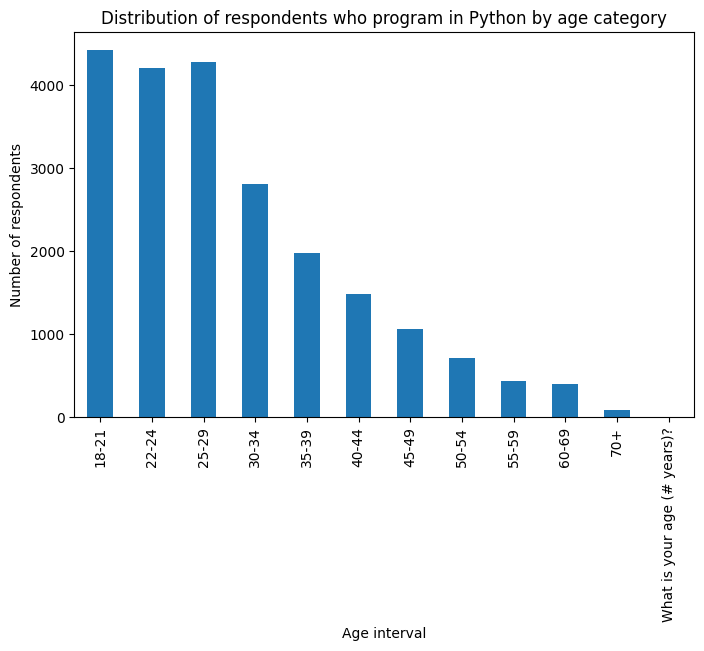

In [9]:
# Visualizing the distribution of respondents who program in Python by age category
df_python = df[df[python_col].notna()]
age_counts_python_all = df_python[age_col].value_counts().sort_index()

plt.figure(figsize=(8,5))
age_counts_python_all.plot(kind='bar')
plt.title('Distribution of respondents who program in Python by age category')
plt.xlabel('Age interval')
plt.ylabel('Number of respondents')
plt.show()

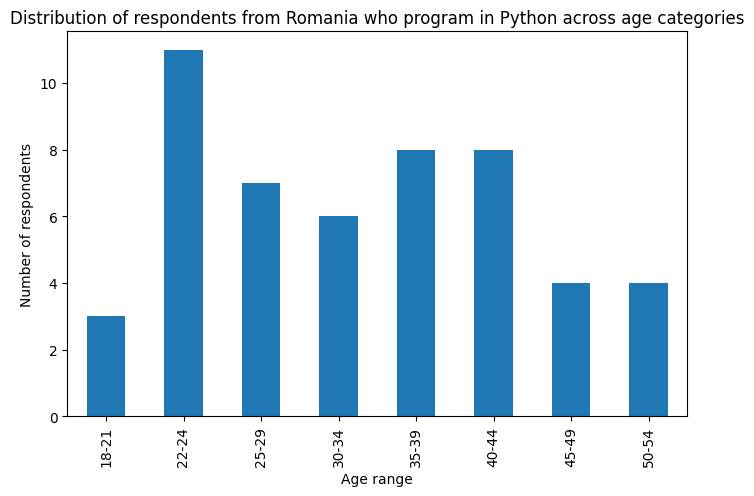

In [10]:
# Visualizing the distribution of respondents from Romania who program in Python across age categories
df_romania_python = df[df['Q3'] == 'Romania']
df_romania_python = df_romania_python[df_romania_python[python_col].notna()]
age_counts_romania_python = df_romania_python[age_col].value_counts().sort_index()

plt.figure(figsize=(8,5))
age_counts_romania_python.plot(kind='bar')
plt.title('Distribution of respondents from Romania who program in Python across age categories')
plt.xlabel('Age range')
plt.ylabel('Number of respondents')
plt.show()

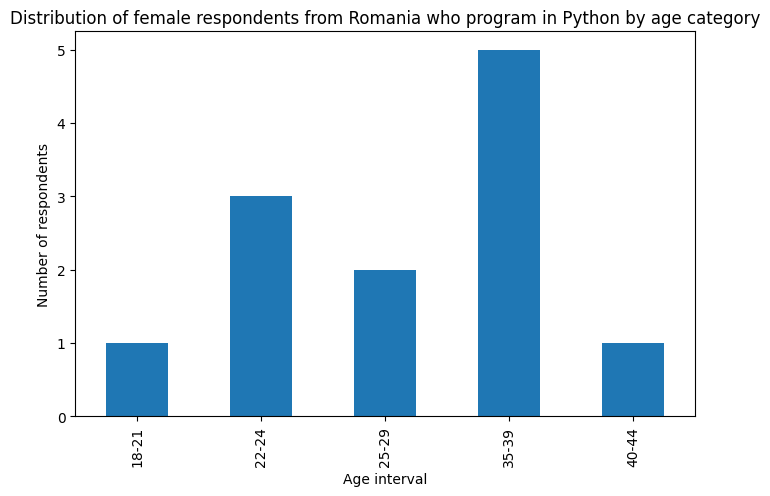

In [11]:
import matplotlib.pyplot as plt

# Define the column names according to your dataset.
# For example, if the column that indicates Python programming is named "Python" and
# the age categories are in the column "Age", then:
python_col = "Q7_Part_1"  # change to your actual column name for Python programming info
age_col = "Q1"  # change to your actual age category column name

# Visualization of the distribution of female respondents from Romania who program in Python by age category
df_romania_female_python_vis = df[
    (df["Q3"] == "Romania") & (df["Q2"] == "Woman") & (df[python_col].notna())
]

age_counts_romania_female_python = (
    df_romania_female_python_vis[age_col].value_counts().sort_index()
)

plt.figure(figsize=(8, 5))
age_counts_romania_female_python.plot(kind="bar")
plt.title(
    "Distribution of female respondents from Romania who program in Python by age category"
)
plt.xlabel("Age interval")
plt.ylabel("Number of respondents")
plt.show()

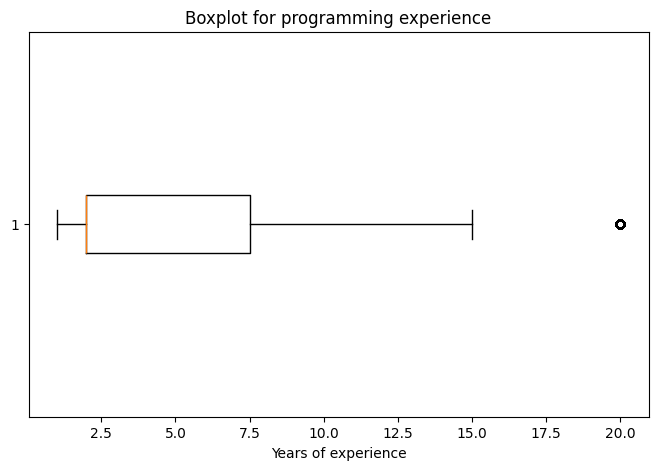

In [12]:
# Boxplot for identifying outliers in programming experience
plt.figure(figsize=(8,5))
plt.boxplot(df['exp_years'].dropna(), vert=False)
plt.title('Boxplot for programming experience')
plt.xlabel('Years of experience')
plt.show()